In [39]:
# given y=sin(x)
# this should be easy to train/learn, with good metrics, but...
# why is accuracy 0?
# also why does it seem to learn from left to right on sine 
# while samples are random and shuffled??

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf

# might need to comment this out if you don't have a GPU
# perhaps unecessary in general, but I haven't found a way to make it work!
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import Callback

from sklearn.model_selection import train_test_split

((6700,), (6700,), (3300,), (3300,))

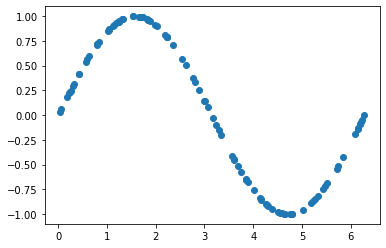

In [40]:
# gen train / examine / check shape
N = 10000
xs = np.array([random.random() * 2.0 * np.pi for _ in range(N)])
ys = np.sin(xs)
x_train, x_test, y_train, y_test = train_test_split(xs, ys, test_size=0.33)
_ = plt.scatter(xs[::100], ys[::100])
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [9]:
def plot_training_history(history, model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Test loss: {loss:.3}')

    print(f'Test accuracy: {accuracy:.3}')

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________
0/0.2703/0.0000/0.1490/0.0000 1/0.1405/0.0000/0.1355/0.0000 2/0.1313/0.0000/0.1465/0.0000 3/0.1181/0.0000/0.1100/0.0000 4/0.0987/0.0000/0.0952/0.0000 

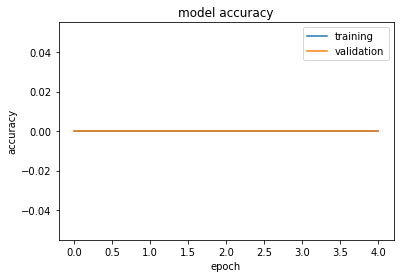

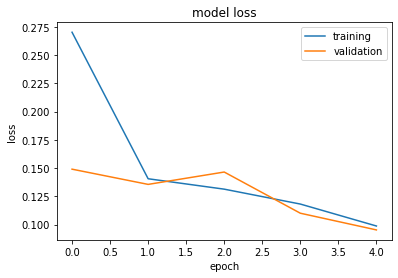

Test loss: 0.0915
Test accuracy: 0.0


In [46]:
# model and train (a little bit)
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print('{:d}/{:.4f}/{:.4f}/{:.4f}/{:.4f} '.format(epoch, logs['loss'], logs['accuracy'], 
            logs['val_loss'], logs['val_accuracy']), end='')


test_data = x_test
test_labels = y_test
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer="adam", loss='mse', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, shuffle=True, batch_size=64,
                    epochs=5, verbose=0, validation_split=.2, callbacks=[MyCallback()])
plot_training_history(history, model)

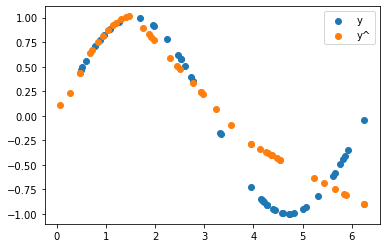

In [47]:
# check some points
o, k = 1, 75
yhat = model.predict(x_test).reshape(-1, )
plt.scatter(x_test[::k], y_test[::k], label='y')
plt.scatter(x_test[o::k], yhat[o::k], label='y^')
plt.legend()

0/0.0834/0.0000/0.0784/0.0000 1/0.0635/0.0000/0.0636/0.0000 2/0.0472/0.0000/0.0403/0.0000 3/0.0332/0.0000/0.0299/0.0000 4/0.0222/0.0000/0.0189/0.0000 5/0.0152/0.0000/0.0129/0.0000 6/0.0101/0.0000/0.0084/0.0000 7/0.0064/0.0000/0.0052/0.0000 8/0.0041/0.0000/0.0034/0.0000 9/0.0029/0.0000/0.0023/0.0000 10/0.0019/0.0000/0.0018/0.0000 11/0.0014/0.0000/0.0011/0.0000 12/0.0011/0.0000/0.0009/0.0000 13/0.0007/0.0000/0.0008/0.0000 14/0.0005/0.0000/0.0005/0.0000 15/0.0005/0.0000/0.0004/0.0000 16/0.0004/0.0000/0.0003/0.0000 17/0.0004/0.0000/0.0003/0.0000 18/0.0002/0.0000/0.0003/0.0000 19/0.0002/0.0000/0.0002/0.0000 20/0.0002/0.0000/0.0002/0.0000 21/0.0002/0.0000/0.0002/0.0000 22/0.0001/0.0000/0.0001/0.0000 23/0.0001/0.0000/0.0001/0.0000 24/0.0001/0.0000/0.0001/0.0000 

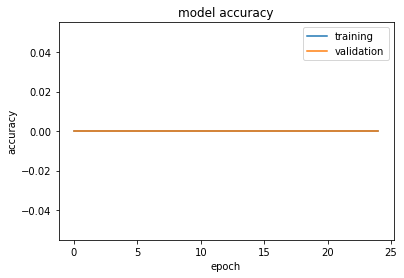

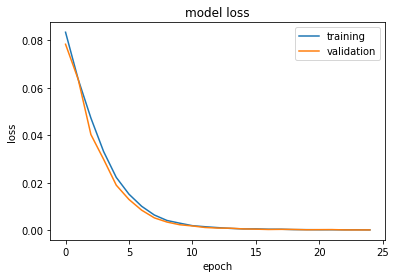

Test loss: 9.63e-05
Test accuracy: 0.0


In [48]:
# train some more
history = model.fit(x_train, y_train, shuffle=True, batch_size=64,
                    epochs=25, verbose=0, validation_split=.2, callbacks=[MyCallback()])
plot_training_history(history, model)

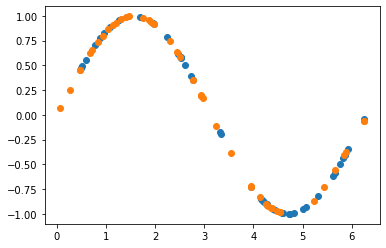

In [49]:
# check again
o, k = 1, 75
yhat = model.predict(x_test).reshape(-1, )
plt.scatter(x_test[::k], y_test[::k], label='y')
plt.scatter(x_test[o::k], yhat[o::k], label='y^')